# DigitRecognizer for a ML challenge - Inference on Image Data
+ The goal of this notebook is to make inference and create the submission file from the best image model

**Content:**
1. [Loading libraries](#1)
1. [Loading the best model](#2)
1. [Making the submission](#3)

<a id="1"></a> <br>
# Loading libraries

In [1]:
!pip install -Uqq fastai timm
!pip install --user torch==1.9.0 torchvision==0.10.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.3 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.3 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.3 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.3 requires wrapt~=1.12.1, but you have wrapt 1.14.0 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-serving-api 2.8.0 requires tensorflow<3,>=2.8.0, but you have tensorflow 2.6.3 which i

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
from fastai.vision.all import *
from fastai.vision import *
import fastai
import torch

In [4]:
print("Fastai version: ",fastai.__version__)

Fastai version:  2.6.3


In [5]:
#To show and save the graphics in the notebook
%matplotlib inline
#To reload automatically all the modules after executing a cell
%reload_ext autoreload
%autoreload 2

<a id="2"></a> <br>
# Loading the best model

In [6]:
path=Path('../input/mnist-image-data-train/test_images')

In [7]:
path_models=Path('../input/models')

In [8]:
def get_x(r): return path/r['image_name']
def get_y(r): return r['label']

In [ ]:
#learn = load_learner(path_models/'resnet34_256_acc0995.pkl',cpu=False)

In [9]:
learn = load_learner(path_models/'convnext_224_acc0997.pkl',cpu=False)

<a id="3"></a> <br>
# Making the submission

In [10]:
path=Path('../input/mnist-image-data-test/test_images')

In [11]:
df_test=pd.read_csv('../input/mnist-image-data-test/MNIST_dataset_Image_Data_test.csv')

In [12]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,image_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Image_0.png
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Image_1.png
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Image_2.png
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Image_3.png
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Image_4.png


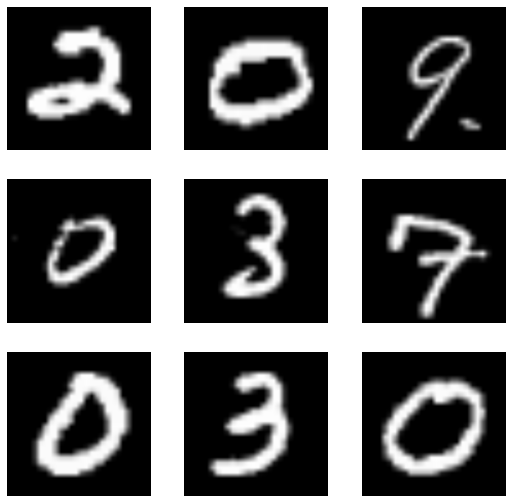

In [13]:
test_dl = learn.dls.test_dl(df_test)
test_dl.show_batch()

In [ ]:
#preds, test_labels = learn.get_preds(dl=test_dl)

In [14]:
preds, test_labels = learn.tta(dl=test_dl)

+ We are using TTA to try to improve the predictions

In [15]:
final_preds = preds.numpy()
final_preds = np.argmax(final_preds, axis=1)

In [16]:
root_path='/kaggle/input/digit-recognizer/'
submission=pd.read_csv(os.path.join(root_path, 'sample_submission.csv'))

In [17]:
submission['Label_test']=final_preds
submission=submission.drop('Label',axis=1)
submission.rename(columns = {'Label_test':'Label'}, inplace = True)
submission.to_csv('./20220508_submission_image_data_v2.csv',index=False)